# Assignment 3: More Pandas & Visualization

Author: Shreya Parjan

Sep 26, 2019

This notebook focuses on part 2 of assignment 3, where we walked through a more complex pandas data processing/visualization process using the courses dataset before conducting our own exploration and visualization of the data.

**Steps to clean up the data**

* Load file from Excel
* Drop some columns we don't need
* Rename the remaining columns
* Create a new column for the department name
* Save data as a CSV

Collaboration: I discussed the assignment with Liz and got help from Lauren & Sophie in help room.

## Table of contents
1. [Exploration 2: Pandas on the Wellesley Courses dataset](#s0)
    - [Step 0: Relevant Initial Inputs](#s1)
    - [Step 1: Load the data from Excel](#s2)
    - [2: Drop some irrelevant columns](#s3)
    - [3: Rename columns](#s4)
    - [4: Create a new column for the department name](#s5)
    - [5: Remove lab sections](#s6)
    - [6: Use 'groupby' to better organize the table](#s7)
    - [7: Create relevant visualizations of the data](#s8)
2. [Individual Exploration](#s9)
    - [1: Waitlists](#s10)
        - [Step 1: Load the data from Excel](#s11)
        - [2: Drop some irrelevant columns](#s12)
        - [3: Rename columns](#s13)
        - [4: Create a new column for the department name](#s14)
    - [2: Buildings](#s15)
        - [Step 1: Load the data from Excel](#s16)
        - [2: Drop some irrelevant columns](#s17)
        - [3: Rename columns](#s18)
        - [4: Create a new column for the department name](#s19)

## Exploration 2: Pandas on the Wellesley Courses dataset
<a id="s0"></a>

### We begin with much of the same data processing method we used in assignment 2.

### Step 0: Relevant Initial Inputs
<a id="s1"></a>

In [1]:
import pandas as pd
import numpy as np

### Step 1: Load the data from Excel
<a id="s2"></a>

In [2]:
# reads in the initial untransformed data from Excel
data = pd.read_excel("courses-2019.xlsx")

### Step 2: Drop some irrelevant columns
<a id="s3"></a>

The table has many more columns that we need. Let's practice dropping some of them. First, let's get all their names:

In [3]:
# Extracts the columns from data
columns = data.columns
print(columns)

Index(['CRN', 'Course', 'Title', 'CurrentEnrollment', 'SeatsAvailable',
       'Location(s)', 'Meeting Time(s)', 'Day(s)', 'Instructor',
       'Additional Instructor(s)', 'Distribution(s)', 'More'],
      dtype='object')


Now we can use the method `drop` to drop multiple columns at once, changing the existing dataframe. Look at the output to see which columns we are keeping. Then, copy and paste the column names that we will be dropping from the previous output cell.

In [4]:
# data_dropped is our new dataframe with several columns that aren't relevant to our analysis removed.
data_dropped = data.drop(columns=['Title','SeatsAvailable','Location(s)','Instructor','Additional Instructor(s)','Distribution(s)','More'])
data_dropped.head()

,CRN,Course,CurrentEnrollment,Meeting Time(s),Day(s)
0,13587,AFR 105 - 01,24,12:45 PM - 3:25 PM,T
1,15568,AFR 201 - 01,8,6:30 PM - 9:10 PM,M
2,15753,AFR 215 - 01,16,9:55 AM - 11:10 AM,MR
3,15071-15207,AFR 242 - 01,30,9:55 AM - 11:10 AM,TF
4,15570-15571,AFR 264 - 01,19,9:55 AM - 11:10 AM,TF


### 3. Rename columns
<a id="s4"></a>

Create a dictionary to map the old names to the new names. Then call the method `rename`, inplace. The new dataframe is shown below.

In [5]:
# data_renamed has renamed our columns from data_dropped

data_renamed = data_dropped.rename(columns={"CRN": "crn", "Course": "course", "CurrentEnrollment": "enrollment", "Meeting Time(s)":"meeting", "Day(s)":"days"})
data_renamed.head()

,crn,course,enrollment,meeting,days
0,13587,AFR 105 - 01,24,12:45 PM - 3:25 PM,T
1,15568,AFR 201 - 01,8,6:30 PM - 9:10 PM,M
2,15753,AFR 215 - 01,16,9:55 AM - 11:10 AM,MR
3,15071-15207,AFR 242 - 01,30,9:55 AM - 11:10 AM,TF
4,15570-15571,AFR 264 - 01,19,9:55 AM - 11:10 AM,TF


### 4. Create a new column for the department name
<a id="s5"></a>

This is an opportunity to use the method `apply` to create the department name from the course name, by splitting the string. You then can create a new column to store the result of the operation.

In [6]:
#splitter is a lambda function that, in this case, splits the department name from the course name
#here we create a new column of the extracted department names
splitter = lambda x: x.split(" ")[0]
data_renamed['dept'] = data_renamed['course'].apply(splitter)
data_renamed.head()

,crn,course,enrollment,meeting,days,dept
0,13587,AFR 105 - 01,24,12:45 PM - 3:25 PM,T,AFR
1,15568,AFR 201 - 01,8,6:30 PM - 9:10 PM,M,AFR
2,15753,AFR 215 - 01,16,9:55 AM - 11:10 AM,MR,AFR
3,15071-15207,AFR 242 - 01,30,9:55 AM - 11:10 AM,TF,AFR
4,15570-15571,AFR 264 - 01,19,9:55 AM - 11:10 AM,TF,AFR


### 5. Remove lab sections
<a id="s6"></a>

I've modified splitter several times here so that we can separate the level and number from the course and drop any lab courses (or in CS 115's case, "d"-something sections) that double count students in a class.

In [7]:
#I keep modifying splitter depending on what I want to reference in the dataframe

#this splitter extracts the level from the course
splitter = lambda y: y.split(" ")[1][0]
data_renamed['level'] = data_renamed['course'].apply(splitter)

#this splitter extracts the full course number from the course
splitter = lambda z: z.split(" ")[1]
data_renamed['number'] = data_renamed['course'].apply(splitter)

#this splitter identifies labs in the course
splitter = lambda a: a.split(" ")[3][0]
data_renamed['isLab'] = data_renamed['course'].apply(splitter)

#based on what's in isLab
data_renamed['isLab'] = data_renamed['isLab'].replace('L', True)
data_renamed['isLab'] = data_renamed['isLab'].replace('D', True) #CS 115 has something with a "D" instead of labs

data_renamed['isLab'] = data_renamed['isLab'].replace('0', False)

### 6. Use 'groupby' to better organize the table
<a id="s7"></a>
The ultimate goal here is to look at their distribution of enrollment by course level: 100, 200, 300.

First, I conduct a quick test to better understand the groupby() method in Pandas. I decided to make a separate dataframe called "grouped" and just take a quick look at how it organizes some CS classes when I group by department and level.

In [8]:
data_renamed = data_renamed.drop(data_renamed[data_renamed['isLab'] == True].index)
data_renamed

grouped = data_renamed.groupby(['dept','level'])
grouped.get_group(('CS', '3'))

,crn,course,enrollment,meeting,days,dept,level,number,isLab
258,14187,CS 304 - 01,25,9:55 AM - 11:10 AM,TF,CS,3,304,False
259,15121,CS 305 - 01,18,11:20 AM - 12:35 PM,MR,CS,3,305,False
260,12670,CS 307 - 01,21,8:30 AM - 9:45 AM,MR,CS,3,307,False
261,15633,CS 313 - 01,18,9:55 AM - 11:10 AM,MR,CS,3,313,False
262,15764,CS 323 - 01,20,2:20 PM - 3:35 PM,MR,CS,3,323,False


Now that I understand the groupby method, I can apply it to grouping by course level and department to make a table organized by how many people are in each level of a course for each department.

(I had to pivot my table so that it lined up more cleanly)

In [9]:
grouped_enrollment = data_renamed.groupby(('dept','level'), as_index=False).agg({"enrollment": "sum"})
df = grouped_enrollment.pivot(index='dept', columns='level', values='enrollment')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


I renamed my columns to more clearly correspond to 100/200/300 level courses.

In [12]:
df = df.rename(columns={"1": "100", "2": "200", "3": "300"})
df

level,100,200,300
dept,,,
AFR,24.0,101.0,15.0
AMST,129.0,123.0,14.0
ANTH,63.0,74.0,24.0
ARAB,29.0,27.0,9.0
ARTH,76.0,115.0,60.0
ARTS,97.0,87.0,38.0
ASTR,69.0,8.0,NaN
BIOC,NaN,98.0,11.0
BISC,238.0,148.0,85.0


### 7. Create relevant visualizations of the data
<a id="s8"></a>

I decided to reformat the dataframe into dataframes that are each sorted by 100 200 or 300 level for each of our plots.

In [11]:
import matplotlib.pyplot as plt
df100 = df.sort_values(by=['100'],ascending=False)
df200 = df.sort_values(by=['200'],ascending=False)
df300 = df.sort_values(by=['300'],ascending=False)

df200

level,100,200,300
dept,,,
PSYC,126.0,315.0,129.0
MATH,263.0,303.0,65.0
ECON,326.0,261.0,108.0
HIST,11.0,249.0,43.0
SPAN,32.0,239.0,27.0
CS,151.0,221.0,102.0
ENG,128.0,212.0,86.0
PHIL,78.0,193.0,22.0
CHEM,166.0,166.0,67.0


Text(0.5,1,'Most Popular Departments (by enrollment in 100 levels)')

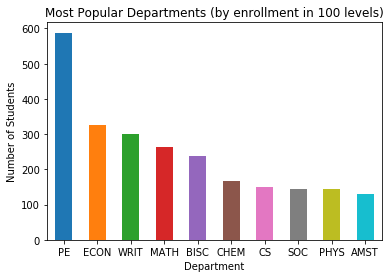

In [102]:
bar100 = df100['100'][:10].plot.bar(rot=0)
bar100.set_xlabel("Department")
bar100.set_ylabel("Number of Students")
plt.title('Most Popular Departments (by enrollment in 100 levels)')

If our goal is to identify the top majors at Wellesley College, 100 levels obviously don't tell us much since PE is the most popular 100 level but is not a major at the college. Furthermore, 100 levels are primarily taken by underclassmen who have yet to declare/may just be fulfilling distribution requirements.

Some observations nonetheless: PE is the most popular, likely because all class years take PE. Writing is likely popular at the 100 level because of first year writing classes.

Text(0.5,1,'Most Popular Departments (by enrollment in 200 levels)')

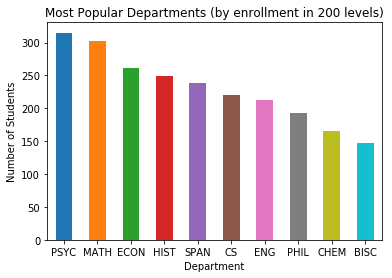

In [103]:
bar200 = df200['200'][:10].plot.bar(rot=0)
bar200.set_xlabel("Department")
bar200.set_ylabel("Number of Students")
plt.title('Most Popular Departments (by enrollment in 200 levels)')

With 200 levels, we start to get a slightly more realistic idea of what majors might be the most popular at the college because most majors are comprised mainly of 200 level classes. However, as is the case with math classes, a lot of people across disciplines take 200 levels in the math dept (ex: 225 for CS majors)

Some observations: ECON remains extremely popular so we can more certainly say that it will be one of the most popular majors at the college. Some of the initial top 10 departments from our 100 level chart have moved off the 200 level, probably because many underclassmen took them as requirements.

Text(0.5,1,'Most Popular Departments (by enrollment in 300 levels)')

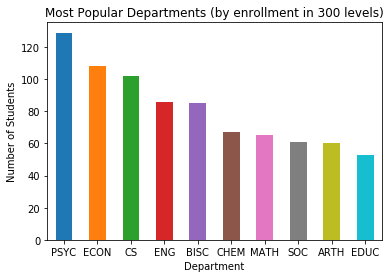

In [104]:
bar300 = df300['300'][:10].plot.bar(rot=0)
bar300.set_xlabel("Department")
bar300.set_ylabel("Number of Students")
plt.title('Most Popular Departments (by enrollment in 300 levels)')

Third, we know that the students in 300 levels are most likely to be majoring in the subject they're taking the class in. Thus, I suspect that these best represent the most popular major departments.

Text(0.5,1,'Most Popular Departments')

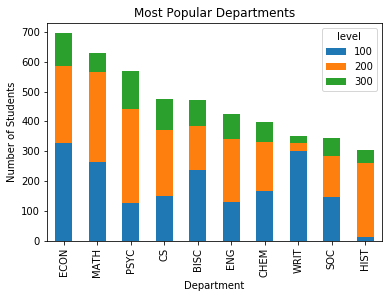

In [105]:
df['sum'] = df['100'] + df['200'] + df['300']
df = df.sort_values(by=['sum'],ascending=False)
df = df.drop(columns = ['sum'])
plot = df[0:10].plot.bar(stacked=True);

plot.set_xlabel("Department")
plot.set_ylabel("Number of Students")
plt.title('Most Popular Departments')

Finally, to see what departments are most popular overall (perhaps less specific to what majors are most popular), we can aggregate numbers from our analysis by level 

## Part 3: Individual Exploration
<a id="s9"></a>

## #1: Waitlists
<a id="s10"></a>

Guiding Questions:
On average, how many students were offered a spot off of the waitlist for a course? How much of a given class is comprised of waitlisted students?

### Step 1: Load the data from Excel
<a id="s11"></a>

In [106]:
data = pd.read_excel("courses-2019.xlsx")
data.head()

,CRN,Course,Title,CurrentEnrollment,SeatsAvailable,Location(s),Meeting Time(s),Day(s),Instructor,Additional Instructor(s),Distribution(s),More
0,13587,AFR 105 - 01,AFR 105-01 - Intro to Black Experience,24,22 / 46,Founders 120 Lecture Hall,12:45 PM - 3:25 PM,T,Selwyn Cudjoe,NaN,"HS, SBA",More
1,15568,AFR 201 - 01,AFR 201-01 - African-Amer Lit Tradition,8,22 / 30,Founders 319 Classroom,6:30 PM - 9:10 PM,M,Selwyn Cudjoe,NaN,LL,More
2,15753,AFR 215 - 01,AFR 215-01 - Unpacking Blackness,16,9 / 25,Green Hall 136C Classroom,9:55 AM - 11:10 AM,MR,Chipo Dendere,NaN,SBA,More
3,15071-15207,AFR 242 - 01,AFR 242-01/ REL 214-01 - New World Afro-Atlant...,30,0 / 30,Founders 121 Classroom,9:55 AM - 11:10 AM,TF,Liseli Fitzpatrick,NaN,REP,More
4,15570-15571,AFR 264 - 01,AFR 264-01/ ARTH 264-01 - African Art,19,6 / 25,Jewett Art Center 454 Seminar Room,9:55 AM - 11:10 AM,TF,Nikki Greene,NaN,ARS,More


### Step 2: Drop some irrelevant columns
<a id="s12"></a>

In [107]:
columns = data.columns
data_dropped = data.drop(columns=['CRN','Title','Location(s)','Instructor','Additional Instructor(s)','Distribution(s)','Meeting Time(s)','Day(s)','More'])
data_dropped.head()

,Course,CurrentEnrollment,SeatsAvailable
0,AFR 105 - 01,24,22 / 46
1,AFR 201 - 01,8,22 / 30
2,AFR 215 - 01,16,9 / 25
3,AFR 242 - 01,30,0 / 30
4,AFR 264 - 01,19,6 / 25


### 3. Format dataset & create relevant new variables
<a id="s13"></a>
(very similar to above)

First, we extract how many seats were filled with non-waitlist, standard students.
Subsequently, we extract the department, level, and number of the course as we did above.
We also repeat the removal of lab courses that double count students.

In [108]:
#I recycled "splitter" which I modified depending on what indices we were looking for
splitter = lambda x: x.split(" ")[2]
data_dropped['seats'] = data_dropped['SeatsAvailable'].apply(splitter)

splitter = lambda y: y.split(" ")[0]
data_dropped['dept'] = data_dropped['Course'].apply(splitter)
splitter = lambda y: y.split(" ")[1][0]
data_dropped['level'] = data_dropped['Course'].apply(splitter)
splitter = lambda z: z.split(" ")[1]
data_dropped['number'] = data_dropped['Course'].apply(splitter)

splitter = lambda a: a.split(" ")[3][0]
data_dropped['isLab'] = data_dropped['Course'].apply(splitter)
data_dropped['isLab'] = data_dropped['isLab'].replace('L', True)
data_dropped['isLab'] = data_dropped['isLab'].replace('D', True) #CS 115 has something with a "D" instead of labs
data_dropped['isLab'] = data_dropped['isLab'].replace('0', False)
data_dropped = data_dropped.drop(data_dropped[data_dropped['isLab'] == True].index)

Now, we create new columns for class size (combined waitlist and regular students), number of regular students, number of waitlisted students, and percent of students in the class that are waitlistees. 

In [109]:
data_dropped['Class Size'] = data_dropped['CurrentEnrollment'].astype(int)
data_dropped['Regular Students'] = data_dropped['seats'].astype(int)

data_dropped['Waitlist Students'] = (-1)*(data_dropped['Regular Students']-data_dropped['Class Size'])
df = data_dropped.sort_values(by=['Waitlist Students'],ascending=False)
df['percent'] = 100*(df['Waitlist Students']/df['Class Size'])

dfWaitlist = df[df['Waitlist Students'] > 0] #only care about courses that accepted students off the waitlist
dfWaitlist = dfWaitlist.set_index('Course')
dfWaitlist.head()

,CurrentEnrollment,SeatsAvailable,seats,dept,level,number,isLab,Class Size,Regular Students,Waitlist Students,percent
Course,,,,,,,,,,,
STAT 260 - 01,45,-20 / 25,25,STAT,2,260,False,45,25,20,44.444444
QR 260 - 01,45,-20 / 25,25,QR,2,260,False,45,25,20,44.444444
MATH 205 - 03,34,-9 / 25,25,MATH,2,205,False,34,25,9,26.470588
MATH 205 - 04,32,-7 / 25,25,MATH,2,205,False,32,25,7,21.875000
WGST 150 - 01,30,-5 / 25,25,WGST,1,150,False,30,25,5,16.666667


### 4. Create relevant visualizations of the data
<a id="s14"></a>

Text(0.5,1,'Distribution of Regular and Waitlist Students (Relative to Class Size Distributions)')

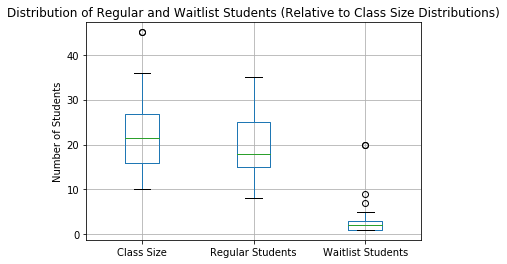

In [110]:
plot = dfWaitlist.boxplot(column=['Class Size','Regular Students','Waitlist Students'])
plot.set_ylabel("Number of Students")
plt.title('Distribution of Regular and Waitlist Students (Relative to Class Size Distributions)')

In [111]:
dfTop10 = dfWaitlist[0:10]

Text(0.5,1,'Percentage of students from waitlist in classes that accepted the most waitlisted students')

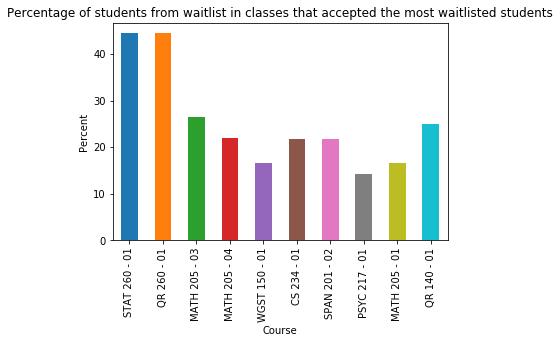

In [112]:
plot = dfTop10['percent'].plot.bar(rot=90)
plot.set_ylabel("Percent")
plt.title('Percentage of students from waitlist in classes that accepted the most waitlisted students')
#of the classes that accepted the most students off the waitlist,
#what percent of the total class did these waitlisted students account for?

** Reflection: **
Save for some significant outliers (especially STAT 260), the spread in the number of waitlisted students across classes is very low, which makes sense since most classes accept <5 people off the waitlist. The variation in overall class size is much larger and reflects the large outlier from STAT 260. There are no outliers in regular students since normal class size is more regimented. Math/quantitative classes seemed to accept more people off waitlists than other subjects.

## #2: Buildings
<a id="s15"></a>
Guiding Question: Where do most classes take place?

### Step 1: Load the data from Excel
<a id="s16"></a>

In [113]:
data = pd.read_excel("courses-2019.xlsx")
columns = data.columns
print(columns)

Index(['CRN', 'Course', 'Title', 'CurrentEnrollment', 'SeatsAvailable',
       'Location(s)', 'Meeting Time(s)', 'Day(s)', 'Instructor',
       'Additional Instructor(s)', 'Distribution(s)', 'More'],
      dtype='object')


### Step 2: Drop some irrelevant columns
<a id="s17"></a>

In [114]:
data_dropped = data.drop(columns=['Day(s)','CurrentEnrollment','CRN','Title','SeatsAvailable','Instructor','Meeting Time(s)','Additional Instructor(s)','Distribution(s)','More'])
data_dropped.head()

,Course,Location(s)
0,AFR 105 - 01,Founders 120 Lecture Hall
1,AFR 201 - 01,Founders 319 Classroom
2,AFR 215 - 01,Green Hall 136C Classroom
3,AFR 242 - 01,Founders 121 Classroom
4,AFR 264 - 01,Jewett Art Center 454 Seminar Room


### 3. Format dataset & create relevant new variables
<a id="s18"></a>

I made a new variable, "building," by extracting the building name from "Location(s)" in the original CSV.

In [115]:
data_dropped = data_dropped.rename(columns={"Course": "course", "Location(s)": "building"})
data_dropped['building'] = data_dropped['building'].astype(str)
data_dropped.head()

,course,building
0,AFR 105 - 01,Founders 120 Lecture Hall
1,AFR 201 - 01,Founders 319 Classroom
2,AFR 215 - 01,Green Hall 136C Classroom
3,AFR 242 - 01,Founders 121 Classroom
4,AFR 264 - 01,Jewett Art Center 454 Seminar Room


### 4. Create relevant visualizations of the data
<a id="s19"></a>

Text(0.5,1,'Top 10 buildings where classes are held')

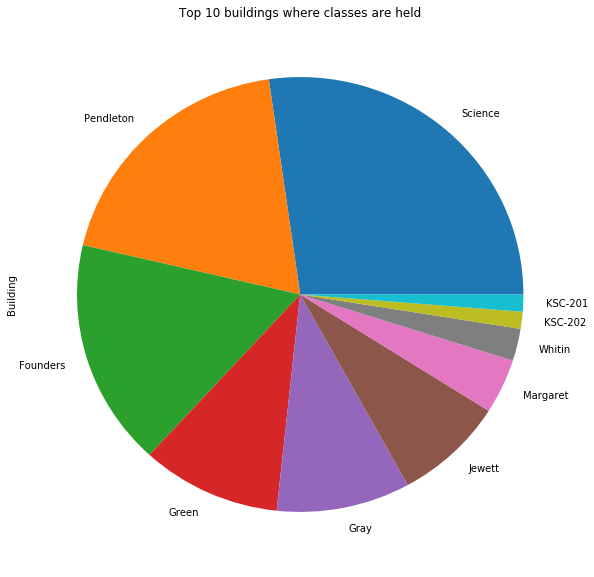

In [116]:
splitter = lambda b: b.split(" ")[0]
data_dropped['building'] = data_dropped['building'].apply(splitter)
df = data_dropped.set_index('course')
plot = df.building.value_counts().head(10).plot(kind='pie',figsize=(10, 10)) #head(10) so we don't crowd chart
plot.set_ylabel("Building")
plt.title('Top 10 buildings where classes are held')

** Reflection: ** Most classes are held in the science center, even though a signature percentage are now in the Gray Lot Modulars (Gray). This likely because a large number of classes are STEM courses. This is followed by Pendleton and Founders, reflecting the distribution of humanities and social science courses (as well as some STEM courses that have been moved into the Academic Quad.)